In [59]:
# @author PRAVEEN CHANDRASEKARAN
# email: pc2846@g.rit.edu

# Importing essential NN libraries
import tensorflow
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dropout
from keras.callbacks import Callback
from sklearn.metrics import confusion_matrix,precision_score
from keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

# For Math
import numpy as np
import os

# For Data Viz.
from matplotlib.pyplot import figure
from matplotlib import pyplot as plt

In [60]:
# Load MNIST dataset from Keras
(x_train, y_train),(x_test, y_test) = keras.datasets.mnist.load_data()

In [61]:
x_train.shape

(60000, 28, 28)

### Before Nomalizing input lables

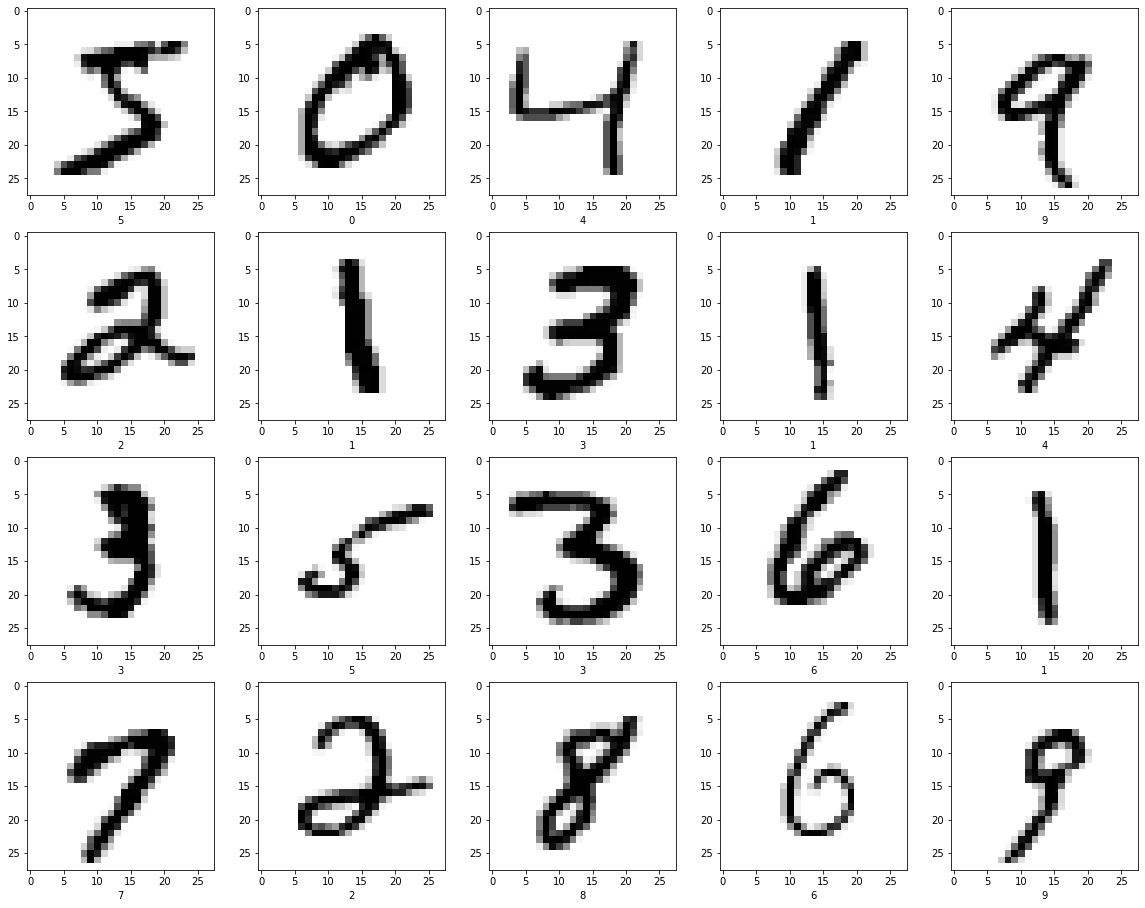

In [62]:
# Plotting the figures in the dataset using Matplotlib
plt.figure(figsize=(20,20))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks()
    plt.yticks()
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])

In [63]:
# Data normalization - Step 2
x_train = tensorflow.keras.utils.normalize(x_train, axis=1)
x_test = tensorflow.keras.utils.normalize(x_test, axis=1)

### After Normalizing input lables

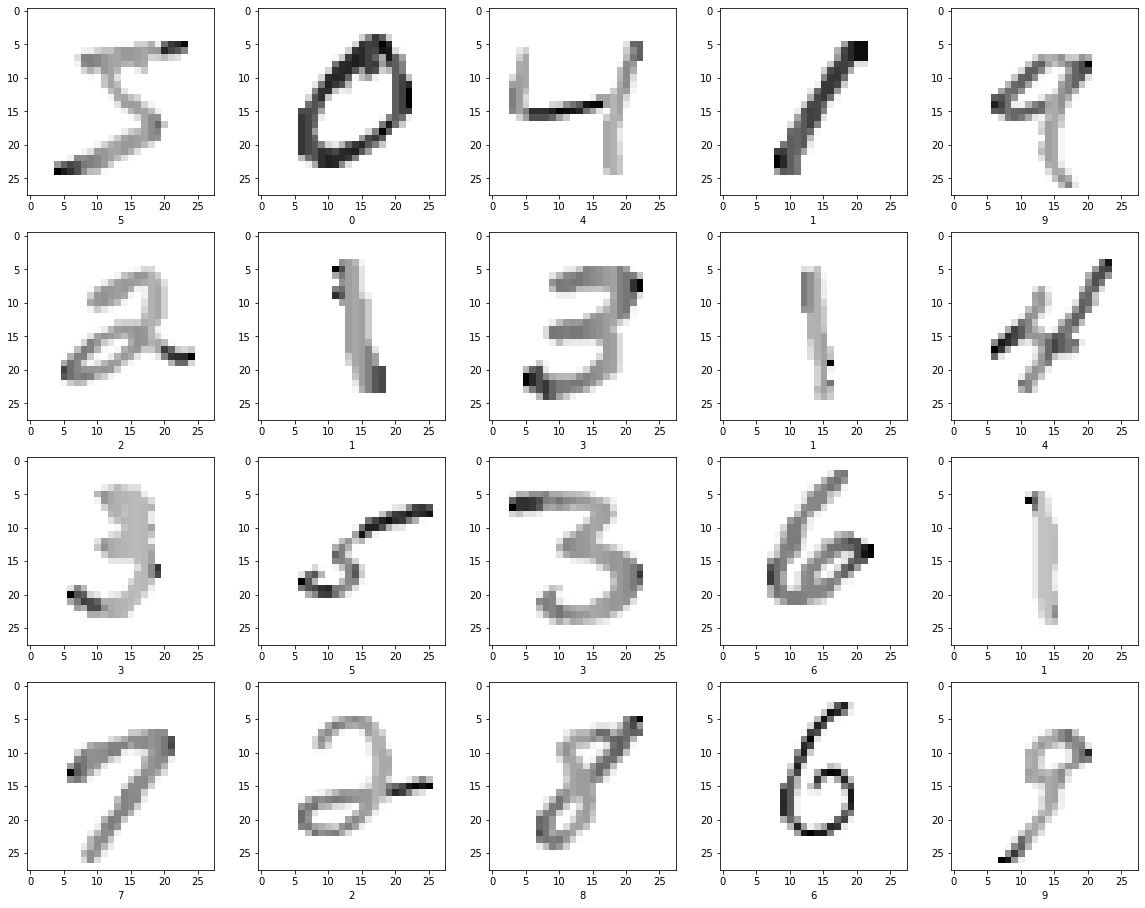

In [64]:
# Plotting the figures in the dataset using Matplotlib
plt.figure(figsize=(20,20))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks()
    plt.yticks()
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])

**Observation**: Images are distorted after scalling the dataset as there will be loss of exact data as the values in the 2d matrix are scaled between 0 and 1. However, this will help in impoving the accuracy or in other words, we can reduce the loss and this enables the model to converge towards a decent much faster

In [65]:
# Shape of the input x_train data
print("Shape of the input x_train data before reshaping:")
print("(",x_train.shape[1],",",x_train.shape[2],")")

Shape of the input x_train data before reshaping:
( 28 , 28 )


In [66]:
# Reshaping 2D image data to 1D 
x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)

### After reshaping to 1D array

In [67]:
# Displaying the shapes of the train and test input datasets 
print("Shape of x_train: ")
print("(", x_train_flattened.shape[1],",", "1)")
print()
print("Shape of x_test: ")
print("(", x_test_flattened.shape[1],",", "1)")

Shape of x_train: 
( 784 , 1)

Shape of x_test: 
( 784 , 1)


In [68]:
# One hot encoding for categorical target labels 
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

Transforming above target labels for a given sample into an array of 1s and 0s where the index of the number 1 indicates the digit the image represents. We do this because otherwise our model would interpret the digit 9 as having a higher priority than the number 3

**Neural Network Architecture:**
<br>
<br>
Number of classes: 10 (Ten unique digits)
<br>
<br>
Number of layers: 4
<br>
<br>
Number of Nodes in each layer: 64
<br>
<br>
Activation funtions used in each layer: 
- Input layer => Relu
- Hidden layer => Relu
- Output layer => Softmax (multi-class classification problem)

In [69]:
# Stochastic Gradient Decent is being used as an optimizer for this problem 

# Setting the params for Stochastic Gradient Decent
num_classes = 10
epochs = 65
learningRate = 0.1
decay_rate = learningRate/epochs # As the epochs increase the decay rate decreases
momentum_value = 0.8

# Stochastic Gradient Decent for compiling the NN model later
#Default values for SGD. lr=0.1, m=0, decay=0
#Nesterov has stronger theoretical converge guarantees for convex functions.
sgd = keras.optimizers.SGD(learning_rate = learningRate, momentum = momentum_value, decay = decay_rate, nesterov=False)

In [70]:
# Flattened input dimension
input_dim = x_train_flattened.shape[1] # The input layer requires the special input_shape parameter which should match
print("Input shape to be fed into the input layer:", input_dim)

Input shape to be fed into the input layer: 784


In [71]:
# Building the NN model - 1

def nn_model():
    
    # Model type selected
    model = Sequential()
    
    # Dense layers are fully connected layers
    # Adding a input dense layer with input number of nodes = 64, Using Relu as activation function, 
    # setting uniform weights to the nodes 
    model.add(Dense(64, activation='relu', kernel_initializer='uniform', input_dim = input_dim)) 
    
    # Adding dropout at this layer as 20% for avoiding overfitting 
    model.add(Dropout(0.2))
    
    # Adding hidden layer with same params
    model.add(Dense(64, kernel_initializer='uniform', activation='relu'))
    
    # Adding the last layer with softmax activation as this is a multi-class classification problem 
    model.add(Dense(num_classes, kernel_initializer='uniform', activation='softmax'))
    
    # Compile the model using loss as categorical_crossentropy as this is a classification problem with the params defined above
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['acc'])
    
    return model

In [72]:
# Model summary
exp_model = nn_model()
print(exp_model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 64)                50240     
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_17 (Dense)             (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
None


In [73]:
# Exponential decay used instead of static learning rate of 0.1
# 𝑙𝑟 = 𝑙𝑟₀ × 𝑒**(−𝑘𝑡) # Instead of constant steps for learning rate a decreasing exponential function is used as epochs go by

def exp_decay(epoch):
    lrate = learningRate * np.exp(-decay_rate*epoch)
    return lrate

In [74]:
# Creating Model Checkpoint

# Specifying the path where the file has to be stored 
checkpoint_path = r"C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5"

# Create a callback that saves the model's weights
model_checkPoint = ModelCheckpoint(filepath=checkpoint_path, verbose=1, 
                                                save_weights_only=True,
                                                save_freq=20)

In [75]:
# learning schedule callback
lr_rate = LearningRateScheduler(exp_decay)
callbacks_list_for_model_1 = [lr_rate, model_checkPoint]

In [76]:
# Fitting the model

# Batch Size 
batch_size = 100

# Fitting model with all params
exp_history = exp_model.fit(x_train_flattened, y_train, batch_size = batch_size, epochs= epochs, callbacks= callbacks_list_for_model_1, verbose=1,
                        validation_data=(x_test_flattened, y_test))


Epoch 1/65
  1/600 [..............................] - ETA: 2:43 - loss: 2.3028 - acc: 0.0800
Epoch 00001: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
 38/600 [>.............................] - ETA: 2s - loss: 2.2994 - acc: 0.1279 
Epoch 00001: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
 57/600 [=>............................] - ETA: 2s - loss: 2.2949 - acc: 0.1754
Epoch 00001: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
 78/600 [==>...........................] - ETA: 2s - loss: 2.2763 - acc: 0.2214
Epoch 00001: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
 95/600 [===>..........................] - ETA: 2s - loss: 2.2111 - acc: 0.2584
Epoch 00001: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS D

201/600 [=========>....................] - ETA: 1s - loss: 0.2894 - acc: 0.9148
Epoch 00002: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
221/600 [==========>...................] - ETA: 1s - loss: 0.2870 - acc: 0.9151
Epoch 00002: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
241/600 [===========>..................] - ETA: 1s - loss: 0.2844 - acc: 0.9159
Epoch 00002: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
261/600 [============>.................] - ETA: 1s - loss: 0.2811 - acc: 0.9168
Epoch 00002: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
281/600 [=============>................] - ETA: 1s - loss: 0.2781 - acc: 0.9179
Epoch 00002: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1

415/600 [===================>..........] - ETA: 0s - loss: 0.2150 - acc: 0.9357
Epoch 00003: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
432/600 [====================>.........] - ETA: 0s - loss: 0.2149 - acc: 0.9357
Epoch 00003: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
453/600 [=====================>........] - ETA: 0s - loss: 0.2137 - acc: 0.9361
Epoch 00003: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
473/600 [======================>.......] - ETA: 0s - loss: 0.2130 - acc: 0.9362
Epoch 00003: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
494/600 [=======================>......] - ETA: 0s - loss: 0.2130 - acc: 0.9360
Epoch 00003: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1

600/600 [==============================] - 4s 6ms/step - loss: 0.1828 - acc: 0.9462 - val_loss: 0.1416 - val_acc: 0.9564
Epoch 5/65
 18/600 [..............................] - ETA: 1s - loss: 0.1542 - acc: 0.9544
Epoch 00005: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
 38/600 [>.............................] - ETA: 2s - loss: 0.1601 - acc: 0.9508
Epoch 00005: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
 55/600 [=>............................] - ETA: 2s - loss: 0.1597 - acc: 0.9520
Epoch 00005: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
 76/600 [==>...........................] - ETA: 2s - loss: 0.1612 - acc: 0.9513
Epoch 00005: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
 95/600 [===>..........................] - ETA: 2s -

181/600 [========>.....................] - ETA: 1s - loss: 0.1571 - acc: 0.9504
Epoch 00006: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
201/600 [=========>....................] - ETA: 1s - loss: 0.1559 - acc: 0.9513
Epoch 00006: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
221/600 [==========>...................] - ETA: 1s - loss: 0.1547 - acc: 0.9519
Epoch 00006: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
241/600 [===========>..................] - ETA: 1s - loss: 0.1541 - acc: 0.9522
Epoch 00006: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
261/600 [============>.................] - ETA: 1s - loss: 0.1551 - acc: 0.9524
Epoch 00006: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1

381/600 [==================>...........] - ETA: 0s - loss: 0.1462 - acc: 0.9566
Epoch 00007: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
401/600 [===================>..........] - ETA: 0s - loss: 0.1460 - acc: 0.9568
Epoch 00007: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
421/600 [====================>.........] - ETA: 0s - loss: 0.1457 - acc: 0.9569
Epoch 00007: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
441/600 [=====================>........] - ETA: 0s - loss: 0.1460 - acc: 0.9571
Epoch 00007: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
461/600 [======================>.......] - ETA: 0s - loss: 0.1455 - acc: 0.9573
Epoch 00007: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1

581/600 [============================>.] - ETA: 0s - loss: 0.1408 - acc: 0.9583
Epoch 00008: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
600/600 [==============================] - 2s 3ms/step - loss: 0.1400 - acc: 0.9584 - val_loss: 0.1223 - val_acc: 0.9642
Epoch 9/65
 14/600 [..............................] - ETA: 2s - loss: 0.1257 - acc: 0.9629
Epoch 00009: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
 33/600 [>.............................] - ETA: 3s - loss: 0.1213 - acc: 0.9612
Epoch 00009: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
 58/600 [=>............................] - ETA: 3s - loss: 0.1313 - acc: 0.9595
Epoch 00009: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
 79/600 [==>...........................] - ETA: 2s -

173/600 [=======>......................] - ETA: 2s - loss: 0.1281 - acc: 0.9604
Epoch 00010: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
194/600 [========>.....................] - ETA: 2s - loss: 0.1273 - acc: 0.9606
Epoch 00010: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
214/600 [=========>....................] - ETA: 2s - loss: 0.1277 - acc: 0.9602
Epoch 00010: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
233/600 [==========>...................] - ETA: 2s - loss: 0.1281 - acc: 0.9600
Epoch 00010: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
254/600 [===========>..................] - ETA: 2s - loss: 0.1280 - acc: 0.9601
Epoch 00010: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1

378/600 [=================>............] - ETA: 1s - loss: 0.1282 - acc: 0.9619
Epoch 00011: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
398/600 [==================>...........] - ETA: 1s - loss: 0.1272 - acc: 0.9620
Epoch 00011: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
418/600 [===================>..........] - ETA: 1s - loss: 0.1281 - acc: 0.9620
Epoch 00011: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
439/600 [====================>.........] - ETA: 1s - loss: 0.1280 - acc: 0.9619
Epoch 00011: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
457/600 [=====================>........] - ETA: 0s - loss: 0.1279 - acc: 0.9618
Epoch 00011: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1

561/600 [===========================>..] - ETA: 0s - loss: 0.1237 - acc: 0.9622
Epoch 00012: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
581/600 [============================>.] - ETA: 0s - loss: 0.1240 - acc: 0.9621
Epoch 00012: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
600/600 [==============================] - 2s 4ms/step - loss: 0.1244 - acc: 0.9620 - val_loss: 0.1133 - val_acc: 0.9673
Epoch 13/65
  1/600 [..............................] - ETA: 1s - loss: 0.1910 - acc: 0.9500
Epoch 00013: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
 21/600 [>.............................] - ETA: 1s - loss: 0.1158 - acc: 0.9657
Epoch 00013: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
 41/600 [=>............................] - ETA: 1s 

141/600 [======>.......................] - ETA: 2s - loss: 0.1140 - acc: 0.9658
Epoch 00014: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
161/600 [=======>......................] - ETA: 2s - loss: 0.1125 - acc: 0.9664
Epoch 00014: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
181/600 [========>.....................] - ETA: 2s - loss: 0.1103 - acc: 0.9670
Epoch 00014: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
201/600 [=========>....................] - ETA: 2s - loss: 0.1131 - acc: 0.9668
Epoch 00014: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
221/600 [==========>...................] - ETA: 1s - loss: 0.1140 - acc: 0.9661
Epoch 00014: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1

341/600 [================>.............] - ETA: 0s - loss: 0.1167 - acc: 0.9642
Epoch 00015: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
361/600 [=================>............] - ETA: 0s - loss: 0.1172 - acc: 0.9639
Epoch 00015: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
381/600 [==================>...........] - ETA: 0s - loss: 0.1169 - acc: 0.9640
Epoch 00015: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
401/600 [===================>..........] - ETA: 0s - loss: 0.1166 - acc: 0.9642
Epoch 00015: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
421/600 [====================>.........] - ETA: 0s - loss: 0.1162 - acc: 0.9643
Epoch 00015: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1

541/600 [==========================>...] - ETA: 0s - loss: 0.1162 - acc: 0.9646
Epoch 00016: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
561/600 [===========================>..] - ETA: 0s - loss: 0.1158 - acc: 0.9647
Epoch 00016: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
581/600 [============================>.] - ETA: 0s - loss: 0.1157 - acc: 0.9646
Epoch 00016: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
600/600 [==============================] - 2s 4ms/step - loss: 0.1149 - acc: 0.9648 - val_loss: 0.1085 - val_acc: 0.9681
Epoch 17/65
  1/600 [..............................] - ETA: 1s - loss: 0.0724 - acc: 0.9700
Epoch 00017: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
 21/600 [>.............................] - ETA: 1s 

121/600 [=====>........................] - ETA: 1s - loss: 0.1119 - acc: 0.9664
Epoch 00018: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
141/600 [======>.......................] - ETA: 1s - loss: 0.1117 - acc: 0.9668
Epoch 00018: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
161/600 [=======>......................] - ETA: 1s - loss: 0.1109 - acc: 0.9670
Epoch 00018: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
181/600 [========>.....................] - ETA: 1s - loss: 0.1098 - acc: 0.9671
Epoch 00018: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
201/600 [=========>....................] - ETA: 1s - loss: 0.1108 - acc: 0.9668
Epoch 00018: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1

321/600 [===============>..............] - ETA: 0s - loss: 0.1077 - acc: 0.9680
Epoch 00019: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
341/600 [================>.............] - ETA: 0s - loss: 0.1074 - acc: 0.9681
Epoch 00019: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
361/600 [=================>............] - ETA: 0s - loss: 0.1068 - acc: 0.9682
Epoch 00019: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
381/600 [==================>...........] - ETA: 0s - loss: 0.1067 - acc: 0.9684
Epoch 00019: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
401/600 [===================>..........] - ETA: 0s - loss: 0.1069 - acc: 0.9681
Epoch 00019: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1

521/600 [=========================>....] - ETA: 0s - loss: 0.1053 - acc: 0.9684
Epoch 00020: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
541/600 [==========================>...] - ETA: 0s - loss: 0.1051 - acc: 0.9684
Epoch 00020: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
561/600 [===========================>..] - ETA: 0s - loss: 0.1054 - acc: 0.9684
Epoch 00020: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
581/600 [============================>.] - ETA: 0s - loss: 0.1057 - acc: 0.9683
Epoch 00020: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
600/600 [==============================] - 2s 4ms/step - loss: 0.1059 - acc: 0.9682 - val_loss: 0.1043 - val_acc: 0.9691
Epoch 21/65
  1/600 [..............................] - ETA: 1s 

101/600 [====>.........................] - ETA: 1s - loss: 0.1101 - acc: 0.9671
Epoch 00022: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
121/600 [=====>........................] - ETA: 1s - loss: 0.1078 - acc: 0.9674
Epoch 00022: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
141/600 [======>.......................] - ETA: 1s - loss: 0.1093 - acc: 0.9667
Epoch 00022: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
161/600 [=======>......................] - ETA: 1s - loss: 0.1076 - acc: 0.9672
Epoch 00022: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
181/600 [========>.....................] - ETA: 1s - loss: 0.1049 - acc: 0.9677
Epoch 00022: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1

301/600 [==============>...............] - ETA: 1s - loss: 0.1068 - acc: 0.9684
Epoch 00023: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
321/600 [===============>..............] - ETA: 1s - loss: 0.1060 - acc: 0.9684
Epoch 00023: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
341/600 [================>.............] - ETA: 0s - loss: 0.1057 - acc: 0.9685
Epoch 00023: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
361/600 [=================>............] - ETA: 0s - loss: 0.1062 - acc: 0.9681
Epoch 00023: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
381/600 [==================>...........] - ETA: 0s - loss: 0.1064 - acc: 0.9684
Epoch 00023: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1

501/600 [========================>.....] - ETA: 0s - loss: 0.1036 - acc: 0.9684
Epoch 00024: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
521/600 [=========================>....] - ETA: 0s - loss: 0.1039 - acc: 0.9684
Epoch 00024: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
541/600 [==========================>...] - ETA: 0s - loss: 0.1040 - acc: 0.9683
Epoch 00024: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
561/600 [===========================>..] - ETA: 0s - loss: 0.1047 - acc: 0.9681
Epoch 00024: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
581/600 [============================>.] - ETA: 0s - loss: 0.1045 - acc: 0.9682
Epoch 00024: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1

 98/600 [===>..........................] - ETA: 2s - loss: 0.1014 - acc: 0.9681
Epoch 00026: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
117/600 [====>.........................] - ETA: 2s - loss: 0.0989 - acc: 0.9698
Epoch 00026: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
138/600 [=====>........................] - ETA: 2s - loss: 0.1026 - acc: 0.9688
Epoch 00026: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
156/600 [======>.......................] - ETA: 2s - loss: 0.1025 - acc: 0.9692
Epoch 00026: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
177/600 [=======>......................] - ETA: 2s - loss: 0.1031 - acc: 0.9689
Epoch 00026: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1

300/600 [==============>...............] - ETA: 1s - loss: 0.1000 - acc: 0.9694
Epoch 00027: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
315/600 [==============>...............] - ETA: 1s - loss: 0.0991 - acc: 0.9697
Epoch 00027: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
335/600 [===============>..............] - ETA: 1s - loss: 0.0986 - acc: 0.9700
Epoch 00027: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
355/600 [================>.............] - ETA: 1s - loss: 0.0987 - acc: 0.9700
Epoch 00027: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
375/600 [=================>............] - ETA: 1s - loss: 0.0987 - acc: 0.9700
Epoch 00027: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1

481/600 [=======================>......] - ETA: 0s - loss: 0.1000 - acc: 0.9698
Epoch 00028: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
501/600 [========================>.....] - ETA: 0s - loss: 0.0995 - acc: 0.9699
Epoch 00028: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
521/600 [=========================>....] - ETA: 0s - loss: 0.0995 - acc: 0.9699
Epoch 00028: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
541/600 [==========================>...] - ETA: 0s - loss: 0.0998 - acc: 0.9697
Epoch 00028: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
561/600 [===========================>..] - ETA: 0s - loss: 0.0996 - acc: 0.9697
Epoch 00028: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1

 61/600 [==>...........................] - ETA: 1s - loss: 0.0903 - acc: 0.9718
Epoch 00030: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
 81/600 [===>..........................] - ETA: 1s - loss: 0.0895 - acc: 0.9726
Epoch 00030: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
101/600 [====>.........................] - ETA: 1s - loss: 0.0897 - acc: 0.9723
Epoch 00030: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
121/600 [=====>........................] - ETA: 1s - loss: 0.0875 - acc: 0.9737
Epoch 00030: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
141/600 [======>.......................] - ETA: 1s - loss: 0.0906 - acc: 0.9726
Epoch 00030: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1

261/600 [============>.................] - ETA: 1s - loss: 0.0995 - acc: 0.9691
Epoch 00031: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
281/600 [=============>................] - ETA: 1s - loss: 0.0989 - acc: 0.9694
Epoch 00031: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
301/600 [==============>...............] - ETA: 0s - loss: 0.0981 - acc: 0.9698
Epoch 00031: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
321/600 [===============>..............] - ETA: 0s - loss: 0.0980 - acc: 0.9699
Epoch 00031: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
341/600 [================>.............] - ETA: 0s - loss: 0.0984 - acc: 0.9702
Epoch 00031: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1

465/600 [======================>.......] - ETA: 0s - loss: 0.0940 - acc: 0.9713
Epoch 00032: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
481/600 [=======================>......] - ETA: 0s - loss: 0.0942 - acc: 0.9713
Epoch 00032: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
501/600 [========================>.....] - ETA: 0s - loss: 0.0942 - acc: 0.9714
Epoch 00032: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
538/600 [=========================>....] - ETA: 0s - loss: 0.0951 - acc: 0.9710
Epoch 00032: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
541/600 [==========================>...] - ETA: 0s - loss: 0.0950 - acc: 0.9711
Epoch 00032: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1

 60/600 [==>...........................] - ETA: 2s - loss: 0.0876 - acc: 0.9747
Epoch 00034: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
 61/600 [==>...........................] - ETA: 2s - loss: 0.0888 - acc: 0.9746
Epoch 00034: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
 81/600 [===>..........................] - ETA: 2s - loss: 0.0896 - acc: 0.9740
Epoch 00034: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
101/600 [====>.........................] - ETA: 2s - loss: 0.0913 - acc: 0.9737
Epoch 00034: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
121/600 [=====>........................] - ETA: 1s - loss: 0.0913 - acc: 0.9731
Epoch 00034: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1

258/600 [===========>..................] - ETA: 1s - loss: 0.0928 - acc: 0.9719
Epoch 00035: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
278/600 [============>.................] - ETA: 1s - loss: 0.0933 - acc: 0.9721
Epoch 00035: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
295/600 [=============>................] - ETA: 1s - loss: 0.0944 - acc: 0.9719
Epoch 00035: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
319/600 [==============>...............] - ETA: 1s - loss: 0.0954 - acc: 0.9714
Epoch 00035: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
325/600 [===============>..............] - ETA: 1s - loss: 0.0958 - acc: 0.9712
Epoch 00035: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1

441/600 [=====================>........] - ETA: 0s - loss: 0.0952 - acc: 0.9710
Epoch 00036: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
461/600 [======================>.......] - ETA: 0s - loss: 0.0949 - acc: 0.9711
Epoch 00036: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
481/600 [=======================>......] - ETA: 0s - loss: 0.0944 - acc: 0.9712
Epoch 00036: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
501/600 [========================>.....] - ETA: 0s - loss: 0.0944 - acc: 0.9712
Epoch 00036: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
521/600 [=========================>....] - ETA: 0s - loss: 0.0940 - acc: 0.9712
Epoch 00036: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1

 21/600 [>.............................] - ETA: 1s - loss: 0.0931 - acc: 0.9710
Epoch 00038: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
 41/600 [=>............................] - ETA: 1s - loss: 0.0978 - acc: 0.9710
Epoch 00038: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
 61/600 [==>...........................] - ETA: 1s - loss: 0.0959 - acc: 0.9707
Epoch 00038: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
 81/600 [===>..........................] - ETA: 1s - loss: 0.0945 - acc: 0.9715
Epoch 00038: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
101/600 [====>.........................] - ETA: 1s - loss: 0.0962 - acc: 0.9719
Epoch 00038: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1

221/600 [==========>...................] - ETA: 1s - loss: 0.0939 - acc: 0.9731
Epoch 00039: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
241/600 [===========>..................] - ETA: 1s - loss: 0.0937 - acc: 0.9729
Epoch 00039: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
261/600 [============>.................] - ETA: 1s - loss: 0.0927 - acc: 0.9731
Epoch 00039: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
281/600 [=============>................] - ETA: 1s - loss: 0.0926 - acc: 0.9732
Epoch 00039: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
301/600 [==============>...............] - ETA: 0s - loss: 0.0928 - acc: 0.9728
Epoch 00039: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1

437/600 [====================>.........] - ETA: 1s - loss: 0.0917 - acc: 0.9723
Epoch 00040: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
457/600 [=====================>........] - ETA: 0s - loss: 0.0916 - acc: 0.9724
Epoch 00040: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
473/600 [======================>.......] - ETA: 0s - loss: 0.0917 - acc: 0.9723
Epoch 00040: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
493/600 [=======================>......] - ETA: 0s - loss: 0.0913 - acc: 0.9723
Epoch 00040: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
512/600 [========================>.....] - ETA: 0s - loss: 0.0917 - acc: 0.9721
Epoch 00040: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1

Epoch 42/65
 20/600 [>.............................] - ETA: 1s - loss: 0.0848 - acc: 0.9770
Epoch 00042: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
 39/600 [>.............................] - ETA: 2s - loss: 0.0817 - acc: 0.9772
Epoch 00042: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
 52/600 [=>............................] - ETA: 2s - loss: 0.0807 - acc: 0.9763
Epoch 00042: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
 73/600 [==>...........................] - ETA: 3s - loss: 0.0834 - acc: 0.9749
Epoch 00042: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
 96/600 [===>..........................] - ETA: 3s - loss: 0.0858 - acc: 0.9737
Epoch 00042: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\

201/600 [=========>....................] - ETA: 1s - loss: 0.0879 - acc: 0.9738
Epoch 00043: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
221/600 [==========>...................] - ETA: 1s - loss: 0.0886 - acc: 0.9734
Epoch 00043: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
241/600 [===========>..................] - ETA: 1s - loss: 0.0889 - acc: 0.9733
Epoch 00043: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
261/600 [============>.................] - ETA: 1s - loss: 0.0892 - acc: 0.9731
Epoch 00043: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
281/600 [=============>................] - ETA: 1s - loss: 0.0887 - acc: 0.9730
Epoch 00043: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1

401/600 [===================>..........] - ETA: 1s - loss: 0.0894 - acc: 0.9728
Epoch 00044: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
436/600 [====================>.........] - ETA: 0s - loss: 0.0892 - acc: 0.9731
Epoch 00044: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
452/600 [=====================>........] - ETA: 0s - loss: 0.0890 - acc: 0.9730
Epoch 00044: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
474/600 [======================>.......] - ETA: 0s - loss: 0.0888 - acc: 0.9730
Epoch 00044: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
497/600 [=======================>......] - ETA: 0s - loss: 0.0887 - acc: 0.9730
Epoch 00044: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1

600/600 [==============================] - 5s 8ms/step - loss: 0.0899 - acc: 0.9729 - val_loss: 0.0975 - val_acc: 0.9725
Epoch 46/65
 15/600 [..............................] - ETA: 2s - loss: 0.0934 - acc: 0.9693
Epoch 00046: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
 32/600 [>.............................] - ETA: 3s - loss: 0.0968 - acc: 0.9669
Epoch 00046: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
 52/600 [=>............................] - ETA: 3s - loss: 0.0919 - acc: 0.9690
Epoch 00046: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
 72/600 [==>...........................] - ETA: 3s - loss: 0.0903 - acc: 0.9700
Epoch 00046: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
 92/600 [===>..........................] - ETA: 3s 

181/600 [========>.....................] - ETA: 1s - loss: 0.0801 - acc: 0.9764
Epoch 00047: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
201/600 [=========>....................] - ETA: 1s - loss: 0.0795 - acc: 0.9764
Epoch 00047: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
232/600 [==========>...................] - ETA: 1s - loss: 0.0817 - acc: 0.9759
Epoch 00047: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
252/600 [===========>..................] - ETA: 1s - loss: 0.0818 - acc: 0.9757
Epoch 00047: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
272/600 [============>.................] - ETA: 1s - loss: 0.0825 - acc: 0.9754
Epoch 00047: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1

381/600 [==================>...........] - ETA: 1s - loss: 0.0873 - acc: 0.9731
Epoch 00048: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
401/600 [===================>..........] - ETA: 1s - loss: 0.0869 - acc: 0.9732
Epoch 00048: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
421/600 [====================>.........] - ETA: 0s - loss: 0.0873 - acc: 0.9731
Epoch 00048: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
441/600 [=====================>........] - ETA: 0s - loss: 0.0871 - acc: 0.9732
Epoch 00048: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
461/600 [======================>.......] - ETA: 0s - loss: 0.0865 - acc: 0.9734
Epoch 00048: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1

581/600 [============================>.] - ETA: 0s - loss: 0.0862 - acc: 0.9736
Epoch 00049: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
600/600 [==============================] - 2s 4ms/step - loss: 0.0863 - acc: 0.9736 - val_loss: 0.0978 - val_acc: 0.9719
Epoch 50/65
  1/600 [..............................] - ETA: 1s - loss: 0.1073 - acc: 0.9500
Epoch 00050: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
 21/600 [>.............................] - ETA: 2s - loss: 0.0974 - acc: 0.9686
Epoch 00050: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
 41/600 [=>............................] - ETA: 2s - loss: 0.0966 - acc: 0.9690
Epoch 00050: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
 61/600 [==>...........................] - ETA: 1s 

171/600 [=======>......................] - ETA: 2s - loss: 0.0901 - acc: 0.9732
Epoch 00051: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
200/600 [=========>....................] - ETA: 2s - loss: 0.0901 - acc: 0.9722
Epoch 00051: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
201/600 [=========>....................] - ETA: 2s - loss: 0.0898 - acc: 0.9723
Epoch 00051: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
221/600 [==========>...................] - ETA: 2s - loss: 0.0889 - acc: 0.9727
Epoch 00051: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
241/600 [===========>..................] - ETA: 1s - loss: 0.0882 - acc: 0.9730
Epoch 00051: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1

361/600 [=================>............] - ETA: 0s - loss: 0.0869 - acc: 0.9728
Epoch 00052: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
381/600 [==================>...........] - ETA: 0s - loss: 0.0871 - acc: 0.9729
Epoch 00052: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
401/600 [===================>..........] - ETA: 0s - loss: 0.0874 - acc: 0.9730
Epoch 00052: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
421/600 [====================>.........] - ETA: 0s - loss: 0.0867 - acc: 0.9731
Epoch 00052: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
441/600 [=====================>........] - ETA: 0s - loss: 0.0866 - acc: 0.9732
Epoch 00052: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1

561/600 [===========================>..] - ETA: 0s - loss: 0.0894 - acc: 0.9715
Epoch 00053: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
581/600 [============================>.] - ETA: 0s - loss: 0.0887 - acc: 0.9717
Epoch 00053: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
600/600 [==============================] - 2s 3ms/step - loss: 0.0885 - acc: 0.9717 - val_loss: 0.0969 - val_acc: 0.9719
Epoch 54/65
  1/600 [..............................] - ETA: 1s - loss: 0.0670 - acc: 0.9700
Epoch 00054: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
 21/600 [>.............................] - ETA: 1s - loss: 0.0835 - acc: 0.9724
Epoch 00054: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
 41/600 [=>............................] - ETA: 1s 

141/600 [======>.......................] - ETA: 1s - loss: 0.0889 - acc: 0.9738
Epoch 00055: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
161/600 [=======>......................] - ETA: 1s - loss: 0.0870 - acc: 0.9741
Epoch 00055: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
181/600 [========>.....................] - ETA: 1s - loss: 0.0891 - acc: 0.9737
Epoch 00055: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
201/600 [=========>....................] - ETA: 1s - loss: 0.0883 - acc: 0.9738
Epoch 00055: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
221/600 [==========>...................] - ETA: 1s - loss: 0.0895 - acc: 0.9730
Epoch 00055: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1

341/600 [================>.............] - ETA: 0s - loss: 0.0870 - acc: 0.9732
Epoch 00056: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
361/600 [=================>............] - ETA: 0s - loss: 0.0868 - acc: 0.9731
Epoch 00056: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
381/600 [==================>...........] - ETA: 0s - loss: 0.0864 - acc: 0.9731
Epoch 00056: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
401/600 [===================>..........] - ETA: 0s - loss: 0.0866 - acc: 0.9728
Epoch 00056: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
421/600 [====================>.........] - ETA: 0s - loss: 0.0859 - acc: 0.9731
Epoch 00056: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1

541/600 [==========================>...] - ETA: 0s - loss: 0.0867 - acc: 0.9730
Epoch 00057: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
561/600 [===========================>..] - ETA: 0s - loss: 0.0870 - acc: 0.9729
Epoch 00057: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
581/600 [============================>.] - ETA: 0s - loss: 0.0870 - acc: 0.9727
Epoch 00057: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
600/600 [==============================] - 2s 3ms/step - loss: 0.0868 - acc: 0.9728 - val_loss: 0.0962 - val_acc: 0.9722
Epoch 58/65
  1/600 [..............................] - ETA: 1s - loss: 0.0709 - acc: 0.9800
Epoch 00058: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
 21/600 [>.............................] - ETA: 1s 

121/600 [=====>........................] - ETA: 1s - loss: 0.0850 - acc: 0.9749
Epoch 00059: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
141/600 [======>.......................] - ETA: 1s - loss: 0.0853 - acc: 0.9748
Epoch 00059: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
161/600 [=======>......................] - ETA: 1s - loss: 0.0870 - acc: 0.9740
Epoch 00059: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
181/600 [========>.....................] - ETA: 1s - loss: 0.0855 - acc: 0.9741
Epoch 00059: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
201/600 [=========>....................] - ETA: 1s - loss: 0.0865 - acc: 0.9739
Epoch 00059: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1

321/600 [===============>..............] - ETA: 0s - loss: 0.0848 - acc: 0.9751
Epoch 00060: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
341/600 [================>.............] - ETA: 0s - loss: 0.0846 - acc: 0.9750
Epoch 00060: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
361/600 [=================>............] - ETA: 0s - loss: 0.0848 - acc: 0.9750
Epoch 00060: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
381/600 [==================>...........] - ETA: 0s - loss: 0.0854 - acc: 0.9747
Epoch 00060: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
401/600 [===================>..........] - ETA: 0s - loss: 0.0863 - acc: 0.9744
Epoch 00060: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1

521/600 [=========================>....] - ETA: 0s - loss: 0.0850 - acc: 0.9746
Epoch 00061: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
541/600 [==========================>...] - ETA: 0s - loss: 0.0850 - acc: 0.9747
Epoch 00061: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
561/600 [===========================>..] - ETA: 0s - loss: 0.0848 - acc: 0.9748
Epoch 00061: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
581/600 [============================>.] - ETA: 0s - loss: 0.0845 - acc: 0.9748
Epoch 00061: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
600/600 [==============================] - 2s 3ms/step - loss: 0.0846 - acc: 0.9748 - val_loss: 0.0956 - val_acc: 0.9724
Epoch 62/65
  1/600 [..............................] - ETA: 1s 

101/600 [====>.........................] - ETA: 2s - loss: 0.0840 - acc: 0.9739
Epoch 00063: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
121/600 [=====>........................] - ETA: 2s - loss: 0.0835 - acc: 0.9739
Epoch 00063: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
141/600 [======>.......................] - ETA: 1s - loss: 0.0849 - acc: 0.9737
Epoch 00063: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
161/600 [=======>......................] - ETA: 1s - loss: 0.0856 - acc: 0.9739
Epoch 00063: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
181/600 [========>.....................] - ETA: 1s - loss: 0.0846 - acc: 0.9741
Epoch 00063: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1

311/600 [==============>...............] - ETA: 2s - loss: 0.0849 - acc: 0.9741
Epoch 00064: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
333/600 [===============>..............] - ETA: 1s - loss: 0.0845 - acc: 0.9739
Epoch 00064: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
351/600 [================>.............] - ETA: 1s - loss: 0.0844 - acc: 0.9740
Epoch 00064: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
371/600 [=================>............] - ETA: 1s - loss: 0.0848 - acc: 0.9740
Epoch 00064: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
393/600 [==================>...........] - ETA: 1s - loss: 0.0845 - acc: 0.9739
Epoch 00064: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1

501/600 [========================>.....] - ETA: 0s - loss: 0.0843 - acc: 0.9734
Epoch 00065: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
533/600 [=========================>....] - ETA: 0s - loss: 0.0842 - acc: 0.9738
Epoch 00065: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
552/600 [==========================>...] - ETA: 0s - loss: 0.0844 - acc: 0.9738
Epoch 00065: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
577/600 [===========================>..] - ETA: 0s - loss: 0.0842 - acc: 0.9738
Epoch 00065: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
597/600 [============================>.] - ETA: 0s - loss: 0.0842 - acc: 0.9738
Epoch 00065: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1

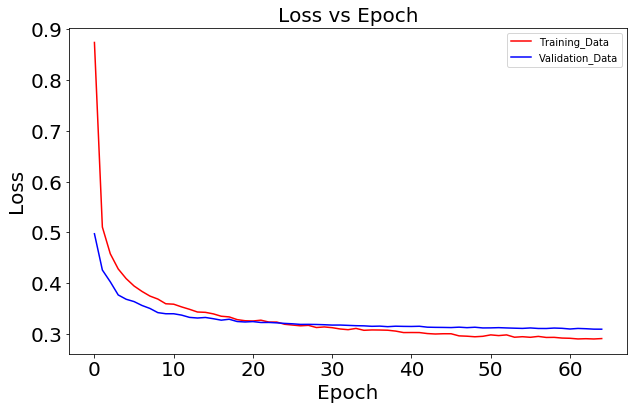

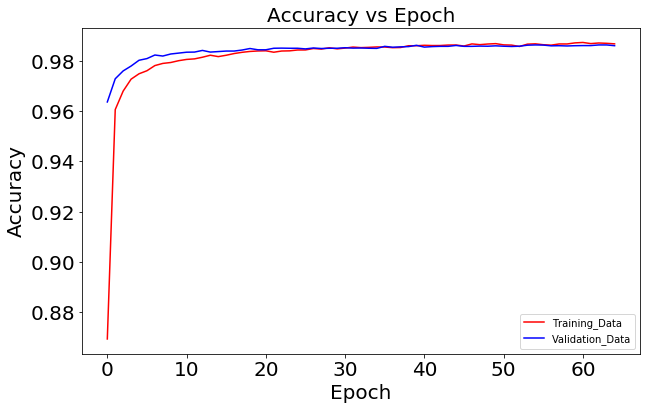

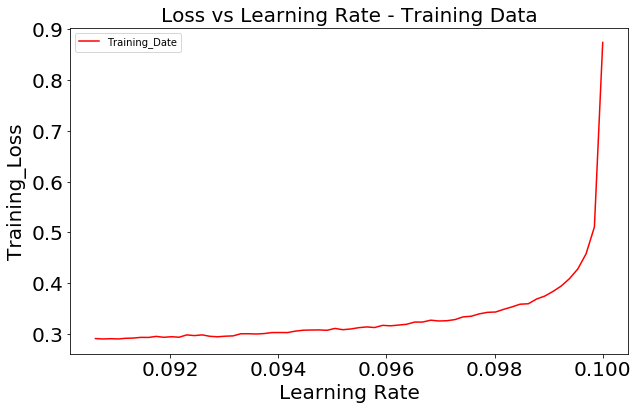

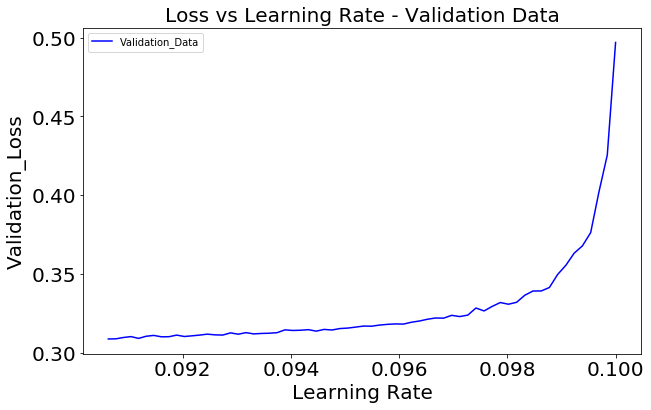

In [77]:
# Plotting for the model with exponential decay and without early stopping

# Plotting the loss function
fig, ax = plt.subplots(1, 1, figsize=(10,6))
plt.title('Loss vs Epoch', fontsize=20)
ax.plot(np.sqrt(exp_history.history['loss']), 'r', label='Training_Data')
ax.plot(np.sqrt(exp_history.history['val_loss']), 'b' ,label='Validation_Data')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

# Plotting the accuracy
fig, ax = plt.subplots(1,1, figsize=(10,6))
plt.title('Accuracy vs Epoch', fontsize=20)
ax.plot(np.sqrt(exp_history.history['acc']), 'r', label='Training_Data')
ax.plot(np.sqrt(exp_history.history['val_acc']), 'b' ,label='Validation_Data')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Accuracy', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

# Plotting the Loss vs Learning Rate of Training data
x = exp_history.history["lr"] #learning_Rate_for_every_epoch
y = np.sqrt(exp_history.history['loss'])
figure(figsize=(10,6))
plt.title('Loss vs Learning Rate - Training Data', fontsize=20)
plt.xlabel('Learning Rate', fontsize=20)
plt.ylabel('Training_Loss', fontsize=20)
plt.tick_params(labelsize=20)
plt.plot(x, y, color='r')
plt.legend(["Training_Date"])
plt.show()

# Plotting the Loss vs Learning Rate of Validation data
x = exp_history.history["lr"] #learning_Rate_for_every_epoch
y = np.sqrt(exp_history.history['val_loss'])
figure(figsize=(10,6))
plt.title('Loss vs Learning Rate - Validation Data', fontsize=20)
plt.xlabel('Learning Rate', fontsize=20)
plt.ylabel('Validation_Loss', fontsize=20)
plt.tick_params(labelsize=20)
plt.plot(x, y, color='b')
plt.legend(["Validation_Data"])
plt.show()

# Plot the loss, ignore 20 batches in the beginning and 5 in the end
# callbacks.lr_finder
# lr_finder = LRFinder(model)
# lr_finder.plot_loss(n_skip_beginning=20, n_skip_end=5)


**The learning rate shoots up when the learning rate is crossing 0.098**

In [78]:
# Setting early stopping
# Desired metric: loss of the validation dataset 
# Training gets terminated at an Epoch when the there is an increase of val_loss value
custom_earlyStopping = EarlyStopping(monitor='val_loss',
                                            min_delta=0.001,
                                            patience=8,
                                            verbose=1,
                                            mode='auto',
                                            baseline=None,
                                            restore_best_weights=False,)

In [79]:
# Fitting model with all params and early stopping (custom values)
exp_history_with_early_stopping = exp_model.fit(x_train_flattened, y_train, batch_size = batch_size, epochs= epochs,
                            callbacks= [lr_rate, custom_earlyStopping], verbose=1,
                            validation_data=(x_test_flattened, y_test)) 

Epoch 1/65
600/600 [==============================] - 1s 2ms/step - loss: 0.0831 - acc: 0.9746 - val_loss: 0.0953 - val_acc: 0.9726
Epoch 2/65
600/600 [==============================] - 1s 2ms/step - loss: 0.0824 - acc: 0.9746 - val_loss: 0.0954 - val_acc: 0.9728
Epoch 3/65
600/600 [==============================] - 3s 4ms/step - loss: 0.0806 - acc: 0.9754 - val_loss: 0.0953 - val_acc: 0.9727
Epoch 4/65
600/600 [==============================] - 3s 5ms/step - loss: 0.0826 - acc: 0.9747 - val_loss: 0.0948 - val_acc: 0.9731
Epoch 5/65
600/600 [==============================] - 2s 3ms/step - loss: 0.0819 - acc: 0.9743 - val_loss: 0.0954 - val_acc: 0.9727
Epoch 6/65
600/600 [==============================] - 2s 4ms/step - loss: 0.0816 - acc: 0.9746 - val_loss: 0.0951 - val_acc: 0.9731
Epoch 7/65
600/600 [==============================] - 3s 5ms/step - loss: 0.0818 - acc: 0.9754 - val_loss: 0.0950 - val_acc: 0.9727
Epoch 8/65
600/600 [==============================] - 3s 5ms/step - loss: 0.

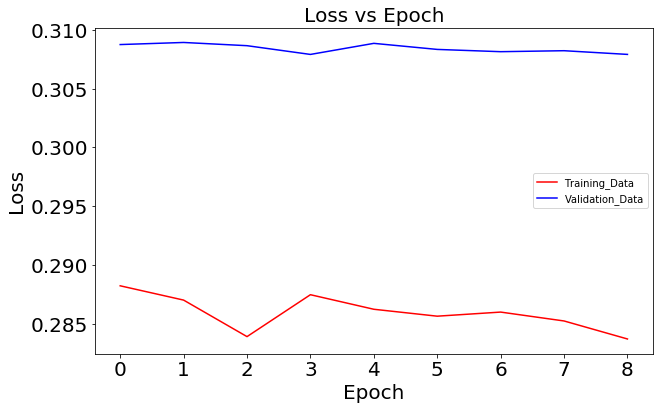

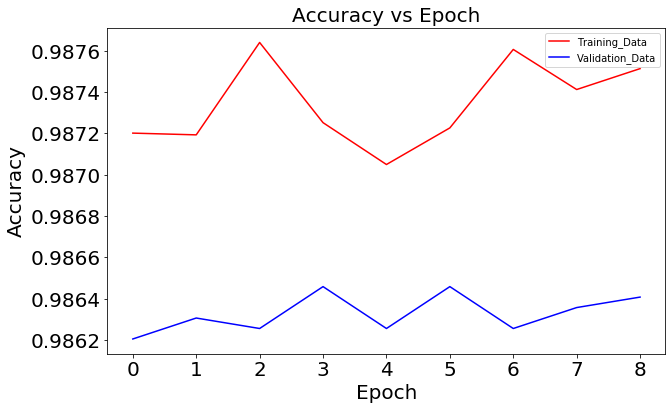

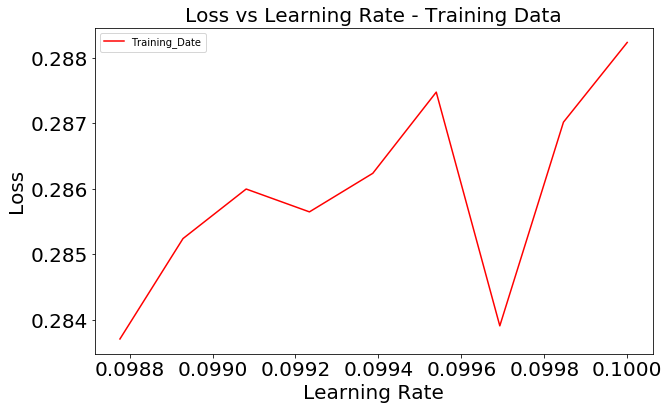

In [80]:
# Plotting for the model with exponential decay and with early stopping

# Plotting the loss function
fig, ax = plt.subplots(1, 1, figsize=(10,6))
plt.title('Loss vs Epoch', fontsize=20)
ax.plot(np.sqrt(exp_history_with_early_stopping.history['loss']), 'r', label='Training_Data')
ax.plot(np.sqrt(exp_history_with_early_stopping.history['val_loss']), 'b' ,label='Validation_Data')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

# Plotting the accuracy
fig, ax = plt.subplots(1,1, figsize=(10,6))
plt.title('Accuracy vs Epoch', fontsize=20)
ax.plot(np.sqrt(exp_history_with_early_stopping.history['acc']), 'r', label='Training_Data')
ax.plot(np.sqrt(exp_history_with_early_stopping.history['val_acc']), 'b' ,label='Validation_Data')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Accuracy', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

# Plotting the Loss vs Learning Rate of Training data
a = exp_history_with_early_stopping.history["lr"]
b = np.sqrt(exp_history_with_early_stopping.history['loss'])
figure(figsize=(10,6))
plt.title('Loss vs Learning Rate - Training Data', fontsize=20)
plt.xlabel('Learning Rate', fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.tick_params(labelsize=20)
plt.plot(a, b, color='r')
plt.legend(["Training_Date"])
plt.show()


**Observation on accuracy of validation data: 97.52%**

In [81]:
# Getting the latest checkpoint file
checkpoint_dir = os.path.dirname(checkpoint_path)
latest = tensorflow.train.latest_checkpoint(checkpoint_dir)

# Create a new model instance
model_latest_checkpoint = nn_model()

# Load the previously saved weights
model_latest_checkpoint.load_weights(latest)

# Re-evaluate the model
loss, acc = model_latest_checkpoint.evaluate(x_test_flattened,  y_test, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

313/313 - 0s - loss: 0.0953 - acc: 0.9723
Restored model, accuracy: 97.23%


# Using new model with Sigmoid as activation function  

Below model is created with layers using Sigmoid as activation function. This model performs very bad. This is done for comparing the performance with the previous model which has Relu as activation function. Please consider the accuracy value from the previous model that uses Relu as activation function 

In [82]:
# Building the NN model - 2

def nn_model_with_sigmoid():
    
    # Model type selected
    model = Sequential()
    
    # Dense layers are fully connected layers
    # Adding a input dense layer with input number of nodes = 64, Using Sigmoid as activation function, 
    # setting uniform weights to the nodes 
    model.add(Dense(64, activation='sigmoid', kernel_initializer='uniform', input_dim = input_dim)) 
    
    # Adding dropout at this layer as 20% for avoiding overfitting 
    model.add(Dropout(0.3))
    
    # Adding hidden layer with same params
    model.add(Dense(64, kernel_initializer='uniform', activation='sigmoid'))
    
    # Adding the last layer with softmax activation as this is a multi-class classification problem 
    model.add(Dense(num_classes, kernel_initializer='uniform', activation='softmax'))
    
    # Compile the model using loss as categorical_crossentropy as this is a classification problem with the params defined above
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['acc'])
    
    return model

In [83]:
# Model summary
exp_mode_1 = nn_model_with_sigmoid()
print(exp_mode_1.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 64)                50240     
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_23 (Dense)             (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
None


In [84]:
# Fitting model with all params
exp_history_with_sigmoid = exp_mode_1.fit(x_train_flattened, 
                                          y_train, 
                                          batch_size = batch_size,
                                          epochs= epochs,
                                          callbacks= [lr_rate],
                                          verbose=1,
                                          validation_data=(x_test_flattened, y_test))

Epoch 1/65
600/600 [==============================] - 1s 2ms/step - loss: 2.3020 - acc: 0.1108 - val_loss: 2.3010 - val_acc: 0.1135
Epoch 2/65
600/600 [==============================] - 2s 3ms/step - loss: 2.3015 - acc: 0.1124 - val_loss: 2.3011 - val_acc: 0.1135
Epoch 3/65
600/600 [==============================] - 2s 3ms/step - loss: 2.3015 - acc: 0.1124 - val_loss: 2.3012 - val_acc: 0.1135
Epoch 4/65
600/600 [==============================] - 3s 5ms/step - loss: 2.3015 - acc: 0.1118 - val_loss: 2.3015 - val_acc: 0.1135
Epoch 5/65
600/600 [==============================] - 3s 5ms/step - loss: 2.3015 - acc: 0.1124 - val_loss: 2.3011 - val_acc: 0.1135
Epoch 6/65
600/600 [==============================] - 3s 5ms/step - loss: 2.3014 - acc: 0.1120 - val_loss: 2.3010 - val_acc: 0.1135
Epoch 7/65
600/600 [==============================] - 2s 3ms/step - loss: 2.3013 - acc: 0.1123 - val_loss: 2.3013 - val_acc: 0.1135
Epoch 8/65
600/600 [==============================] - 3s 5ms/step - loss: 2.

600/600 [==============================] - 2s 4ms/step - loss: 2.2985 - acc: 0.1130 - val_loss: 2.2983 - val_acc: 0.1135
Epoch 63/65
600/600 [==============================] - 2s 4ms/step - loss: 2.2984 - acc: 0.1166 - val_loss: 2.2979 - val_acc: 0.1135
Epoch 64/65
600/600 [==============================] - 2s 3ms/step - loss: 2.2983 - acc: 0.1125 - val_loss: 2.2980 - val_acc: 0.1135
Epoch 65/65
600/600 [==============================] - 2s 3ms/step - loss: 2.2982 - acc: 0.1125 - val_loss: 2.2979 - val_acc: 0.1135


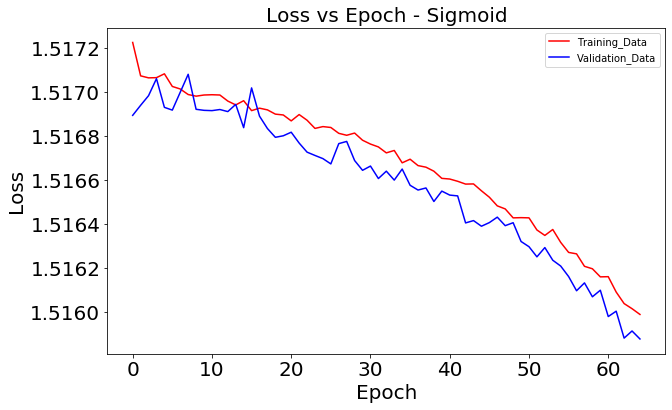

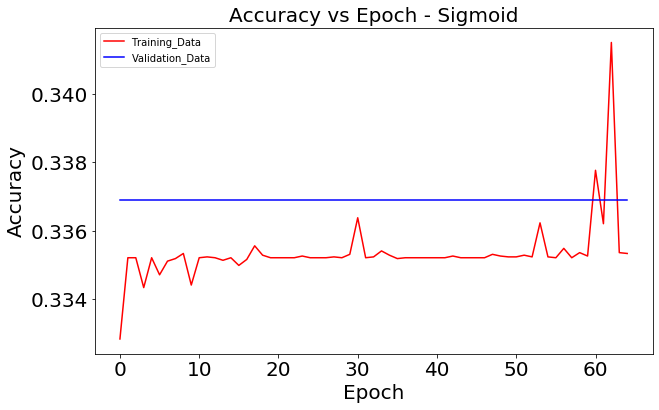

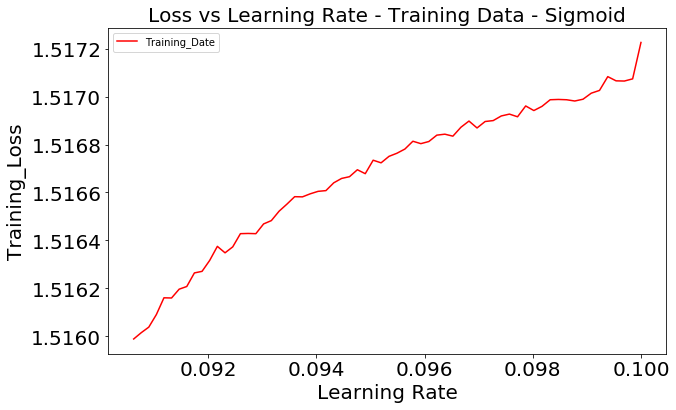

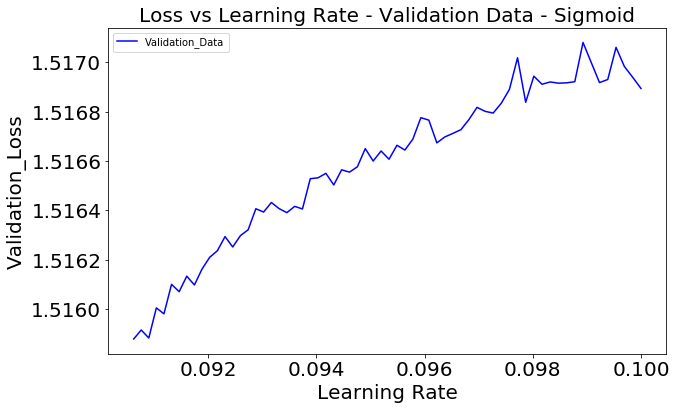

In [86]:
# Plotting for the model with exponential decay and without early stopping

# Plotting the loss function
fig, ax = plt.subplots(1, 1, figsize=(10,6))
plt.title('Loss vs Epoch - Sigmoid', fontsize=20)
ax.plot(np.sqrt(exp_history_with_sigmoid.history['loss']), 'r', label='Training_Data')
ax.plot(np.sqrt(exp_history_with_sigmoid.history['val_loss']), 'b' ,label='Validation_Data')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

# Plotting the accuracy
fig, ax = plt.subplots(1,1, figsize=(10,6))
plt.title('Accuracy vs Epoch - Sigmoid', fontsize=20)
ax.plot(np.sqrt(exp_history_with_sigmoid.history['acc']), 'r', label='Training_Data')
ax.plot(np.sqrt(exp_history_with_sigmoid.history['val_acc']), 'b' ,label='Validation_Data')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Accuracy', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

# Plotting the Loss vs Learning Rate of Training data
x = exp_history_with_sigmoid.history["lr"] #learning_Rate_for_every_epoch
y = np.sqrt(exp_history_with_sigmoid.history['loss'])
figure(figsize=(10,6))
plt.title('Loss vs Learning Rate - Training Data - Sigmoid', fontsize=20)
plt.xlabel('Learning Rate', fontsize=20)
plt.ylabel('Training_Loss', fontsize=20)
plt.tick_params(labelsize=20)
plt.plot(x, y, color='r')
plt.legend(["Training_Date"])
plt.show()

# Plotting the Loss vs Learning Rate of Validation data
x = exp_history_with_sigmoid.history["lr"] #learning_Rate_for_every_epoch
y = np.sqrt(exp_history_with_sigmoid.history['val_loss'])
figure(figsize=(10,6))
plt.title('Loss vs Learning Rate - Validation Data - Sigmoid', fontsize=20)
plt.xlabel('Learning Rate', fontsize=20)
plt.ylabel('Validation_Loss', fontsize=20)
plt.tick_params(labelsize=20)
plt.plot(x, y, color='b')
plt.legend(["Validation_Data"])
plt.show()